In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
lines1 = pd.read_csv("../data/the-office_lines.csv")
lines1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58721 entries, 0 to 58720
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      58721 non-null  int64 
 1   Character       58721 non-null  object
 2   Line            58721 non-null  object
 3   Season          58721 non-null  int64 
 4   Episode_Number  58721 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


In [29]:

episodes_per_season = lines1.groupby(['Character', 'Season'])['Episode_Number'].nunique().reset_index()
episodes_per_season.columns = ['Character', 'Season', 'Episode_Count']

episodes_per_season.sort_values(["Season", "Episode_Count"], ascending = [True, False])

,Character,Season,Episode_Count
58,Angela,1,6
297,Dwight,1,6
501,Jim,1,6
564,Kevin,1,6
682,Michael,1,6
...,...,...,...
1148,Woman 1,9,1
1149,Woman 2,9,1
1150,Woman 3,9,1
1151,Woman 4,9,1


In [30]:
episodes_per_season.groupby("Character")["Episode_Count"].sum().sort_values(ascending=False)

Character
Dwight                  184
Jim                     183
Pam                     180
Kevin                   177
Angela                  173
                       ... 
Woman 3                   1
Woman 2                   1
Woman 1                   1
Wolf                      1
Window Treatment Guy      1
Name: Episode_Count, Length: 780, dtype: int64

In [31]:
df = lines1[['Season', 'Episode_Number', 'Character']].drop_duplicates()
df

,Season,Episode_Number,Character
0,1,1,Michael
1,1,1,Jim
7,1,1,Pam
16,1,1,Dwight
29,1,1,Jan
...,...,...,...
58626,9,23,Carol Stills
58629,9,23,Carol
58643,9,23,Buyer
58656,9,23,Woman


In [75]:
epXpers = df.groupby("Character")["Episode_Number"].count().sort_values(ascending=False).head(5)
epXpers

Character
Dwight    184
Jim       183
Pam       180
Kevin     177
Angela    173
Name: Episode_Number, dtype: int64

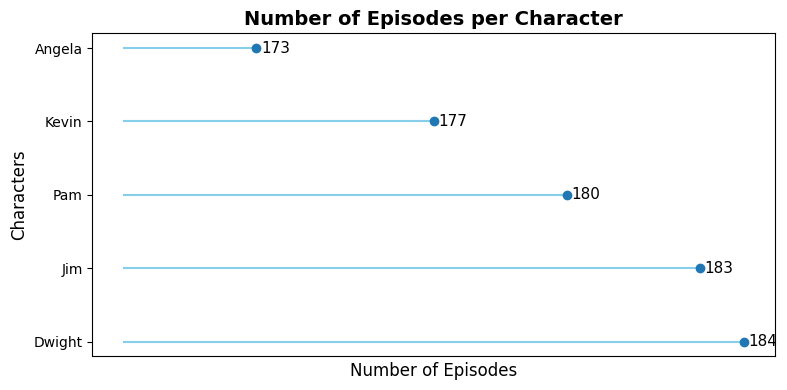

In [ ]:
plt.figure(figsize=(8, 4))
plt.hlines(y=epXpers.index,
           xmin=170,
           xmax=epXpers,
           color='skyblue')
plt.plot(epXpers, epXpers.index, "o");
# Add episode numbers at the end of each lollipop
for i, count in enumerate(epXpers):
    plt.text(count + 0.1, i, f'{count}', va='center', ha='left', fontsize=11)

plt.xticks([])


plt.xlabel('Número de episodios', fontsize=12)
plt.ylabel('Personajes', fontsize=12)
plt.title('Número de Episodios con cada Personaje', fontsize=14, fontweight='bold')
plt.tight_layout()

